# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
def confusion_matrix(y, yhat):
    TP = ((y == 1) & (yhat==1)).sum()
    TN = ((y == 0) & (yhat==0)).sum()
    FP = ((y == 0) & (yhat==1)).sum()
    FN = ((y == 1) & (yhat==0)).sum()
    return TP, TN, FP, FN
def Precision(y, yhat):
    TP, TN, FP, FN = confusion_matrix(y, yhat)
    return TP/(TP+FP)
def Recall(y, yhat):
    TP, TN, FP, FN = confusion_matrix(y, yhat)
    return TP/(TP+FN)
def F1score(y, yhat):
    precision = Precision(y,yhat)
    recall = Recall(y,yhat)
    return (2 * (precision*recall))/(precision+recall)
def Acccuracy(y, yhat):
    TP, TN, FP, FN = confusion_matrix(y, yhat)
    return (TP+TN)/(TP+TN+FP+FN)
def TPR(y,yhat):
    TP, TN, FP, FN = confusion_matrix(y, yhat)
    return TP/(TP+FN)
def FPR(y,yhat):
    TP, TN, FP, FN = confusion_matrix(y, yhat)
    return FP/(TN+FP)
def AUC(y,yhat_prob):
    FPR_array = []
    TPR_array = []
    for threshold in np.arange(0,1,0.001):
        yhat = yhat_prob.apply(lambda a : 1 if a > threshold else 0)
        TP, TN, FP, FN = confusion_matrix(y, yhat)
        tpr = TPR(y,yhat)
        fpr = 1 - FPR(y,yhat)
        FPR_array.append(fpr)
        TPR_array.append(tpr)
    return abs(np.trapz(FPR_array,TPR_array))

In [4]:
data_5_a = pd.read_csv(r'5_a.csv')

In [5]:
data_5_a['proba_class'] = data_5_a['proba'].apply(lambda a : 1 if a > 0.5 else 0)

In [6]:
data_5_a['y'] = data_5_a['y'].astype(int)
data_5_a['proba_class'] = data_5_a['proba_class'].astype(int)

In [7]:
data_5_a.head(10)

y     proba  proba_class
0  1  0.637387            1
1  1  0.635165            1
2  1  0.766586            1
3  1  0.724564            1
4  1  0.889199            1
5  1  0.601600            1
6  1  0.666323            1
7  1  0.567012            1
8  1  0.650230            1
9  1  0.829346            1

In [8]:
def calc_auc(y_true, y_score):
    desc_score_indices = np.argsort(y_score)[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]

    distinct_indices = np.where(np.diff(y_score))[0]
    end = np.array([y_true.size - 1])
    threshold_indices = np.hstack((distinct_indices, end))

    thresholds = y_score[threshold_indices]
    tps = np.cumsum(y_true)[threshold_indices]

    fps = (1 + threshold_indices) - tps
    
    return(tps,fps,thresholds)

0.48829900000000004


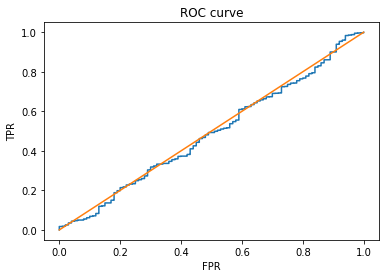

In [11]:
import matplotlib.pyplot as plt
tps, fps, thresholds = calc_auc(np.array(data_5_a['y']),np.array(data_5_a['proba']))
tpr = np.hstack((0,tps/tps[-1]))
fpr = np.hstack((0,fps/fps[-1]))
auc_score = np.trapz(tpr,fpr)
print(auc_score)
plt.plot(fpr, tpr)
plt.plot((0.0,1.0),(0.0,1.0))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [12]:
TP, TN, FP, FN = confusion_matrix(data_5_a['y'], data_5_a['proba_class'])

f1score = F1score(data_5_a['y'], data_5_a['proba_class'])

acc = Acccuracy(data_5_a['y'], data_5_a['proba_class'])

auc = AUC(data_5_a['y'], data_5_a['proba'])
print("Confusion matrix :\n {}".format(np.array([[TN,FP],[FN,TP]])))
print("F1 score: {}".format(f1score))
print("Accuracy: {}".format(acc))
print("Area under the curve (auc): {}".format(auc))

Confusion matrix :
 [[    0   100]
 [    0 10000]]
F1 score: 0.9950248756218906
Accuracy: 0.9900990099009901
Area under the curve (auc): 0.488309


# <pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [13]:
data_5_b = pd.read_csv(r'5_b.csv')
data_5_b.head(10)

y     proba
0  0.0  0.281035
1  0.0  0.465152
2  0.0  0.352793
3  0.0  0.157818
4  0.0  0.276648
5  0.0  0.190260
6  0.0  0.320328
7  0.0  0.435013
8  0.0  0.284849
9  0.0  0.427919

In [14]:
data_5_b['proba_class'] = data_5_b['proba'].apply(lambda a : 1 if a > 0.5 else 0)

In [15]:
data_5_b.head(10)

y     proba  proba_class
0  0.0  0.281035            0
1  0.0  0.465152            0
2  0.0  0.352793            0
3  0.0  0.157818            0
4  0.0  0.276648            0
5  0.0  0.190260            0
6  0.0  0.320328            0
7  0.0  0.435013            0
8  0.0  0.284849            0
9  0.0  0.427919            0

In [16]:
data_5_b['y'] = data_5_b['y'].astype(int)
data_5_b['proba_class'] = data_5_b['proba_class'].astype(int)


In [17]:
TP, TN, FP, FN = confusion_matrix(data_5_b['y'], data_5_b['proba_class'])
f1score = F1score(data_5_b['y'], data_5_b['proba_class'])
acc = Acccuracy(data_5_b['y'], data_5_b['proba_class'])
auc = AUC(data_5_b['y'], data_5_b['proba'])
print("Confusion matrix :\n {}".format(np.array([[TN,FP],[FN,TP]])))
print("F1 score: {}".format(f1score))
print("Accuracy: {}".format(acc))
print("Area under the curve (auc): {}".format(auc))

Confusion matrix :
 [[9761  239]
 [  45   55]]
F1 score: 0.2791878172588833
Accuracy: 0.9718811881188119
Area under the curve (auc): 0.9377150000000001


In [ ]:
tps,fps,threshold = calc_auc(np.array(data_5_b['y']),np.array(data_5_b['proba']))
fpr = np.hstack((0,fps/fps[-1]))
tpr = np.hstack((0,tps/tps[-1]))
auc_score = np.trapz(tpr,fpr)
print(auc_score)
plt.plot(fpr, tpr)
plt.plot((0.0,1.0),(0.0,1.0))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [19]:
data_5_c = pd.read_csv(r'5_c.csv')
data_5_c.head(10)

y      prob
0  0  0.458521
1  0  0.505037
2  0  0.418652
3  0  0.412057
4  0  0.375579
5  0  0.595387
6  0  0.370288
7  0  0.299273
8  0  0.297000
9  0  0.266479

In [ ]:
prob_metA_dict = dict()

# Getting only unique probabilities for threshold in decreasing order
threshold_prob_scores = sorted(set(data_5_c["prob"]), reverse=True)

for value in threshold_prob_scores:
    
# Predicting y values for every unique threshold value
    y_hat = [1 if i[2] >= value else 0 for i in data_5_c.itertuples()]
        
    FN, FP = 0, 0
    
    for i, j in zip(data_5_c["y"], y_hat):
        if (i == 1 and j == 0):
            FN += 1
        if (i == 0 and j == 1):
            FP += 1
    
# Calculating metric A's value for every unique threshold value's FN and FP values
    A = (500 * FN) + (100 * FP)
    
# Making a dictionary with threshold prob values as "key" and its metric A's value as "value"
    prob_metA_dict[value] = A

# Finding the minimum value of metric A
temp = min(prob_metA_dict.values())

# For the minimum value of metric A, finding the adjacent threshold probability value
for k, v in prob_metA_dict.items():
    if v == temp:
        print("The best threshold of probability which gives lowest values of metric A is", k)

<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
data_5_d = pd.read_csv(r'5_d.csv')
data_5_d.head(10)

In [ ]:
# Mean Square Error 
add = 0  
n = data_5_d.shape[0]
for i in range (0,n):  
    difference = data_5_d['y'][i] - data_5_d['pred'][i]  
    squared_difference = difference**2  
    add+= squared_difference  
MSE = add/n
print('MSE : ',MSE)

In [ ]:
# R^2 error
mean_y = data_5_d.y.mean()
SSt = ((data_5_d.y-mean_y)**2).sum()
SSe = ((data_5_d.y-data_5_d.pred)**2).sum()
R_squared=1-(SSe/SSt)
print('R-Square : ',R_squared)

In [ ]:
# MAPE
div = data_5_d.y.sum()
err = abs(data_5_d.y-data_5_d.pred).sum()

MAPE=err/div
print('MAPE : ',MAPE*100,'%')